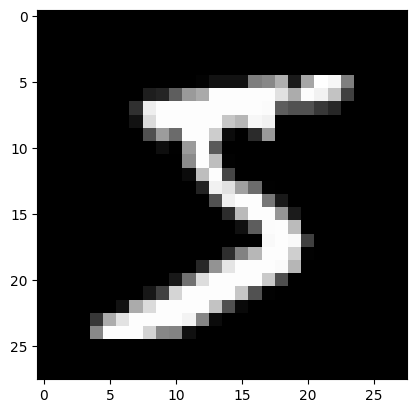

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8735 - loss: 0.4431
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1219
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0777
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9839 - loss: 0.0542
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9880 - loss: 0.0398
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9893 - loss: 0.0346
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9919 - loss: 0.0262
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9936 - loss: 0.0198
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9959 - loss: 0.0155
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9957 - loss: 0.0145
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0780
Accuracy: 98.13%
1/1 ━━━━━━━━━━━━━━━━━━━

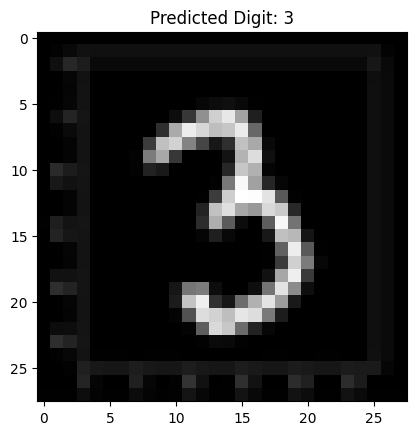

In [9]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from PIL import Image, ImageOps
import numpy as np
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0
# Display the first image in the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.show()
# Build the model
model = Sequential([
Flatten(input_shape=(28, 28)),
Dense(128, activation='relu'),
Dense(10, activation='softmax')])
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


# Train the model
model.fit(x_train, y_train, epochs=10) # Increase the number of epochs
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Function to preprocess the image
def preprocess_image(image_path):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img)
  img = img.resize((28, 28))
  img = np.array(img) / 255.0
  img = img.reshape(1, 28, 28)
  return img
# Path to the handwritten digit image
image_path = '/content/download.jpg'
new_image = preprocess_image(image_path)
# Predict the digit
prediction = model.predict(new_image)
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")
# Display the test image and the predicted digit
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()